<a href="https://colab.research.google.com/github/viralraval/GRIP_SPARKS_FOUNDATION_JULY21_DSBA_TASKS/blob/main/GRIPS_SPARKS_FOUNDATION_DSBA_JULY21_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Created By:-** Viral Rajesh Raval

# **The Sparks Foundation**

#**TASK 1 :-Predict the percentage of an student based on the no. of study hours.**

**Details :**

● This is a simple linear regression task as it involves just 2 variables.

● Data can be found at http://bit.ly/w-data 

● What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#load the dataset
student_data = pd.read_csv('http://bit.ly/w-data')

In [ ]:
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Analysis** :

In [ ]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
student_data.shape

(25, 2)

In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


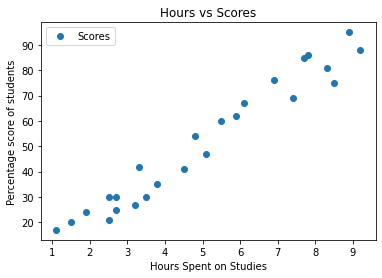

In [ ]:
#plotting a graph of Hours vs Scores
student_data.plot(x='Hours',y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Spent on Studies')
plt.ylabel('Percentage score of students')
plt.show()

**From the above scatter plot there looks to be correlation between the 'Scores' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

In [ ]:
from sklearn.model_selection import train_test_split

X = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(7, 1)
(18,)
(7,)


In [ ]:
#training the model
from sklearn.linear_model import LinearRegression

#fitting model on the training dataset
lin_model =   LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

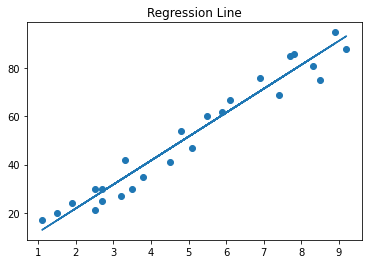

In [ ]:
#Regression Line
line = lin_model.coef_*X + lin_model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title('Regression Line')
plt.plot(X, line);
plt.show()

In [ ]:
#prediction
print(X_test)
y_test_predict = lin_model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [ ]:
#Actutal vs Predicted
df1 = pd.DataFrame({'ACTUAL': y_test, 'PREDICTED': y_test_predict})
df1

,ACTUAL,PREDICTED
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Evaluating the Model**

In [ ]:
#Evaluating model
#On training data
from sklearn.metrics import mean_absolute_error

#On testing data
mae = mean_absolute_error(y_test, y_test_predict)

print("Mean absolute error: ")
print('mae is {}'.format(mae))

Mean absolute error: 
mae is 4.130879918502482


Text(0, 0.5, 'Predict')

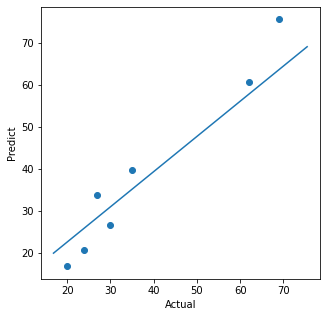

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(y_test,y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test),max(y_test)])
plt.xlabel('Actual')
plt.ylabel('Predict')

**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.   
What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [ ]:
# SOLUTION:- 
predicted_score = lin_model.predict([[9.25]])
print('The predicted score for 9.25 study hours is:',predicted_score)

The predicted score for 9.25 study hours is: [93.89272889]


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**

# **END**